In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Reto 2: Regex

### 1. Objetivos:
    - Practicar expresiones regulares con un conjunto de datos real
 
---
    
### 2. Desarrollo:

Vamos a practicar expresiones regulares utilizando un conjunto de datos llamado 'amazon_fine_food_reviews-clean.csv'. Este conjunto de datos es en realidad un subconjunto de un conjunto más grande que proviene de [esta fuente](https://www.kaggle.com/snap/amazon-fine-food-reviews). Contiene evaluaciones de muchos diversos productos realizadas por usuarios de Amazon. La columna 'text' contiene el texto de la evaluación, y ésa es la columna que nos interesa.

Vamos a practicar expresiones regulares con esa columna. Con cada búsqueda que realices vas a obtener un nuevo subconjunto de datos de un tamaño específico. Al terminar tus búsquedas compara el tamaño de tus subconjuntos de datos con los de tus compañeros, para checar que tus respuestas fueron correctas.

Tu Reto es entonces obtener subconjunto de datos que tengan estas características:

1. Todas las evaluaciones que contengan la palabra 'food' (en minúsculas).
2. Todas las evaluaciones que contengan algún número de dos digitos.
3. Todas las evaluaciones que contengan algún porcentaje (uno o más digitos seguidos de un signo de porcentaje).
4. Todas las evaluaciones que comiencen con la palabra 'Dog' o 'dog'.
5. Todas las evaluaciones que terminen con el fragmento 'awesome.' (fíjate que hay específicamente un punto después de la palabra 'awesome').
6. Todas las evaluaciones que contengan las palabras 'horrible' **o** 'terrible'.
7. Todas las evaluaciones que contengan **solamente** letras minúsculas.

Después de realizar estas exploraciones, limpia tu conjunto de datos para remover lo siguiente de todos tus textos:

1. Cualquier forma parecida a la siguiente: `<br>` o `<br/>` (revisa variaciones de estos tags, con espacios intermedios, por ejemplo)
2. Signos en general
3. Digitos
4. Cualquier otra cosa que no te parezca relevante para nuestro análisis de lenguaje natural

También convierte todas las letras en minúsculas para homogeneizar nuestro conjunto de datos.

Guarda tu conjunto de datos como un archivo 'csv' para que lo puedas utilizar en los próximos retos (asegúrate de incluir **por lo menos** las columnas 'text' y 'score'.

Cargamos los datos

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/amazon_fine_food_reviews-clean.csv")
df.sample(3)

,id,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,summary,text
12541,288133,B001FA1KLW,AKY9EF9HWDYD1,"Mel Goguey ""oldnshort""",0,0,5,1273449600,convience,For home use Amore tomato past is great. The f...
2365,22011,B000KV61FC,A2NXZKOMNRZCJ4,K. Raker,0,0,4,1294790400,"Not for use on tile floors, but otherwise, ama...",My four year old beagle loves the tug a jug! I...
2360,95362,B000E4AHUA,ARSSRSSKP3SZ4,Bea and Pea's Mom,1,2,5,1107043200,It really works.,This really has helped me maintain a milk supp...


In [19]:
# Todas las evaluaciones que contengan la palabra 'food' (en minúsculas).
# Agrupar por product_id
series_text = df['text']

In [20]:
# Todas las evaluaciones que contengan algún número de dos digitos.
series_text[series_text.str.contains("[0-9][0-9]", case=False)]

4        Organic Valley White 1 % Milkfat Lowfat Milk, ...
5        I adopted a rescue dog who had an allergy to c...
10       I have a one year old Pomeranian whom has been...
11       This thing makes a great present for any choco...
12       This has been a great find. My grandmother pas...
                               ...                        
14194    Rcv'd on 20/Nov/06 product w expiry date of 23...
14196    Once when driving on I 95 north, near New York...
14205    Its awesome, perfect. just like the fair! grea...
14207    I had these at a conference once. I have been ...
14210    I ordered these as I have ordered from Amazon ...
Name: text, Length: 3019, dtype: object

In [21]:
# Todas las evaluaciones que contengan algún porcentaje (uno o más digitos seguidos de un signo de porcentaje).
series_text[series_text.str.contains("[0-9][0-9]%", case=False)]

22       I just finished my last Vita Coco that I odere...
69       We use this coffee in a fully automatic "Saeco...
155      I was surprised at the ingredient list and "10...
169      I went through 12 cans in about a week.  Soooo...
203      My kids won't eat broccoli or peas but they wi...
                               ...                        
13973    This is a really good choice for a nutritional...
14020    We mostly eat healthy foods--I'm a vegetarian ...
14167    I've ordered literally hundreds, probably into...
14191    I thought I'd give Blue Horse's 100% Kona Coff...
14207    I had these at a conference once. I have been ...
Name: text, Length: 353, dtype: object

In [22]:
# Todas las evaluaciones que comiencen con la palabra 'Dog' o 'dog'.
series_text[series_text.str.contains("^[Dd]og")]

755      Dogs LOVE Greenies!  They go crazy if they eve...
4853     Dogs liked it "okay."  Did NOT give it th the ...
9693     Dog loves these. Eats them quickly and without...
13252    Dogs probably don't really want to spend most ...
14131    Dogs love it. It smells like chicken. I have b...
Name: text, dtype: object

In [27]:
# Todas las evaluaciones que terminen con el fragmento 'awesome.' (fíjate que hay específicamente un punto después de la palabra 'awesome').
series_text[series_text.str.contains("awesome.$")]

396      I love Tiger Sauce! I eat it with cream cheese...
1304     If you want to improve your milk production, t...
7359     This is a deliscious drink.I have trouble keep...
8340     My boyfriend and I have been trying various bo...
8659     I am a frequent purchaser on Amazon, yet I can...
10035    These are decent, but if you want a realllly g...
10341    these are awesome. though they're gluten free,...
10565    I had never heard of Dende Oil before I read a...
13227    The toy seems pretty durable which is a big wi...
Name: text, dtype: object

In [28]:
# Todas las evaluaciones que contengan las palabras 'horrible' o 'terrible'.
series_text[series_text.str.contains("horrible|terrible")]

355      Within our family, my husband has diabetic neu...
409      This tea is terrible; cheap store tea bags tas...
441      My lab has a very sensitive stomach, and for t...
656      Every once in awhile I like to try different f...
657      I bought this because the amazon page says tha...
                               ...                        
13796    I thought this coffee was really horrible. Had...
13820    These are not chips. Chips implies a crunchine...
13847    I had major issues with Amazon.com in regards ...
13908    I became interested in ACV when a coworker men...
13999    I just bought these for my daughter today at o...
Name: text, Length: 216, dtype: object

In [31]:
# Todas las evaluaciones que contengan solamente letras minúsculas.
series_text[series_text.str.contains("^[a-z][a-z]")]

75       all I can say is... I'm LOVIN' it!  so much ea...
118      good produce i found that the high fiber and n...
138      my daughters dog, Detroit, loves 'em.  otherwi...
168      my dog ( a toy poodle) whos likes people food ...
182      the aroma is awesome!!  love the flavor, reall...
                               ...                        
14116    its the best tea we have had. i order it all t...
14119    this jerkey is possibly the worst i have ever ...
14137    the first time i tried this candy, i was insta...
14150    arrived on time, impecable packing and great p...
14162    these taste amazing. might make the poops burn...
Name: text, Length: 404, dtype: object

Limpieza del conjunto de datos

In [32]:
# Cualquier forma parecida a la siguiente: <br> o <br/>
series_text = series_text.str.replace("<br>|<br/>|br", '')
series_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0        This coffee does NOT come in individual "PODS"...
1        I was a little skeptical after looking at the ...
2        Gloia Jeans Butter Toffee is one of my favorit...
3        My families and friends love Planters peanuts ...
4        Organic Valley White 1 % Milkfat Lowfat Milk, ...
                               ...                        
14206    This tea certainly exceeded my expectations!  ...
14207    I had these at a conference once. I have been ...
14208    I have enjoyed using the maple flavor. It adds...
14209    When I recently started using K-cups, wasn't s...
14210    I ordered these as I have ordered from Amazon ...
Name: text, Length: 14211, dtype: object

In [33]:
# Signos en general
series_text = series_text.str.replace("[^\w\s]","")
series_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0        This coffee does NOT come in individual PODS o...
1        I was a little skeptical after looking at the ...
2        Gloia Jeans Butter Toffee is one of my favorit...
3        My families and friends love Planters peanuts ...
4        Organic Valley White 1  Milkfat Lowfat Milk 8O...
                               ...                        
14206    This tea certainly exceeded my expectations  W...
14207    I had these at a conference once I have been s...
14208    I have enjoyed using the maple flavor It adds ...
14209    When I recently started using Kcups wasnt sure...
14210    I ordered these as I have ordered from Amazon ...
Name: text, Length: 14211, dtype: object

In [36]:
# Digitos
series_text = series_text.str.replace("\d","")
series_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0        This coffee does NOT come in individual PODS o...
1        I was a little skeptical after looking at the ...
2        Gloia Jeans Butter Toffee is one of my favorit...
3        My families and friends love Planters peanuts ...
4        Organic Valley White   Milkfat Lowfat Milk Oun...
                               ...                        
14206    This tea certainly exceeded my expectations  W...
14207    I had these at a conference once I have been s...
14208    I have enjoyed using the maple flavor It adds ...
14209    When I recently started using Kcups wasnt sure...
14210    I ordered these as I have ordered from Amazon ...
Name: text, Length: 14211, dtype: object

In [37]:
# Cualquier otra cosa que no te parezca relevante para nuestro análisis de lenguaje natural
series_text = series_text.str.replace("\s{5}|\s{4}|\s{3}|\s{2}","")
series_text = series_text.str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


## Reto 3: Nltk Text

### 1. Objetivos:
    - Practicar el uso del objeto Text de la librería Nltk
 
---
    
### 2. Desarrollo:

Vamos a practicar utilizar el objeto Text de la librería Nltk. Para practicar utilizaremos el conjunto de datos que limpiaste en el Reto anterior. Este conjunto de datos debería de contener todas las evaluaciones registradas en el dataset 'amazon_fine_food_reviews-clean.csv' ya limpias y listas para el análisis.

Tu Reto consiste en lo siguiente:

1. Aplica el método 'word_tokenize' de nltk para separar todas las evaluaciones por palabras (esto puede tardar un ratito).
2. Genera una sola lista con todas las listas que obtuviste en el paso 1 y úsala para crear un objeto `nltk.Text` (esto también puede tardar un ratito, sé paciente).
3. Busca las concordancias de las palabras 'boy' y 'girl'.
4. Busca las palabras que tengan contextos similares a las palabras 'boy' y 'girl'.
5. Busca los contextos que tengan en común las palabras 'boy' y 'girl'.
6. Cuantifica la riqueza léxica de tu conjunto de datos
7. Sigue tu curiosidad y realiza algunas otras exploraciones por tu cuenta.
8. Comenta tus hallazgos con tus compañeros y la experta.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
# 1. Aplica el método 'word_tokenize' de nltk para separar todas las evaluaciones por palabras (esto puede tardar un ratito).
tokenized_words = series_text.apply(nltk.word_tokenize)
tokenized_words

In [38]:
tokenized_words

0        [this, coffee, does, not, come, in, individual...
1        [i, was, a, little, skeptical, after, looking,...
2        [gloia, jeans, butter, toffee, is, one, of, my...
3        [my, families, and, friends, love, planters, p...
4        [organic, valley, whitemilkfat, lowfat, milk, ...
                               ...                        
14206    [this, tea, certainly, exceeded, my, expectati...
14207    [i, had, these, at, a, conference, once, i, ha...
14208    [i, have, enjoyed, using, the, maple, flavor, ...
14209    [when, i, recently, started, using, kcups, was...
14210    [i, ordered, these, as, i, have, ordered, from...
Name: text, Length: 14211, dtype: object

In [ ]:
# 2. Genera una sola lista con todas las listas que obtuviste en el paso 1 y 
#    úsala para crear un objeto `nltk.Text`
#    (esto también puede tardar un ratito, sé paciente).
all_words = tokenized_words.sum()
text_all_words = nltk.Text(all_words)
text_all_words

In [41]:
# 3. Busca las concordancias de las palabras 'boy' y 'girl'.
print("Girl:")
print(text_all_words.concordance('girl', lines=10))
print("\n")
print("Boy:")
print(text_all_words.concordance('boy', lines=10))

Girl:
Displaying 10 of 71 matches:
th all his life plus both he and his girl friend love the taste i recently pur
 trailers were coming over i had the girl with three boobs from the freak show
 bagmy tiny little italian greyhound girl gets a greenie at bedtime and someti
ame cookies nothing else compares my girl has loved these for two years when t
 this is one of the few treats wilhi girl enjoys just opened this package and 
lly i am a made from scratch kind of girl but wanted to try these flavors and 
wrapped candies i bought as a little girl from the corner store for cents a pi
nded by my wife and i and our little girl poppy without reservation if you can
hearing about this product on hungry girl i love peanut butter but not all tha
tle something extra when shes a good girl and not have to worry if she will ge
None


Boy:
Displaying 10 of 78 matches:
 making of one down to the letter and boy oh boy not only was my husband thrill
 of one down to the letter and boy oh boy not only was

In [42]:
# 4. Busca las palabras que tengan contextos similares a las palabras 'boy' y 'girl'.
print("Girl:")
print(text_all_words.similar('girl'))
print("\n")
print("Boy:")
print(text_all_words.similar('boy'))

Girl:
food tea dog taste coffee one flavor cat and dogs product time mouth
door packaging price water sugar family cookies
None


Boy:
i and it flavor that this there taste he dog but one so she price
shipping amazon bag product cat
None


In [43]:
# 5. Busca los contextos que tengan en común las palabras 'boy' y 'girl'.
text_all_words.common_contexts(['boy', 'girl'])

little_i


In [45]:
# 6. Cuantifica la riqueza léxica de tu conjunto de datos
(len(set(text_all_words)) / len(text_all_words)) * 100

2.674370467970318

In [46]:
# 7. Sigue tu curiosidad y realiza algunas otras exploraciones por tu cuenta.
text_all_words.collocations()

peanut butter; highly recommend; grocery store; gluten free; green
tea; ive tried; year old; dog food; dont know; much better; years ago;
dark chocolate; cat food; olive oil; green mountain; local grocery;
long time; coconut oil; earl grey; high quality


## Reto 4: Nltk FreqDist y Visualizaciones de NLP

### 1. Objetivos:
    - Aprender a realizar análisis estadístico de datos no estructurados utilizando FreqDist
    - Utilizar seaborn para visualizar los análisis estadísticos que visualicemos
 
---
    
### 2. Desarrollo:

Vamos a utilizar el objeto `FreqDist` para hacer análisis estadístico de las mismas evaluaciones que has utilizado en los últimos Retos. Intercalaremos análisis puramente numérico con visualizaciones realizadas con `seaborn` y `matplotlib` para hacer más claros nuestros hallazgos.

Tu Reto consiste en lo siguiente:

1. Tokeniza las evaluaciones y crea una sola lista que contenga todas las palabras en nuestro conjunto de datos.
2. Utiliza el objeto `stopwords` encontrado en la librería `nltk.corpus` para filtrar todas las palabras vacías de tu conjunto de datos y solamente tener palabras relevantes.
3. Crea un objeto `Text` con tu dataset resultante.
4. Crea también un objeto `FreqDist` con el mismo dataset.
5. Obtén las 20 palabras más comunes en el dataset y realiza una gráfica de barras 'verticales' para visualizar su frecuencia.
6. Obtén las 50 palabras más comunes en el dataset y realiza una gráfica de barras 'horizontales' para visualizar su frecuencia.
7. Obtén los 20 bigramas más frecuentes en el dataset y realiza una gráfica de barras 'verticales' para visualizar tu frecuencia.
8. Obtén una lista de las palabras que tengan 10 o más caracteres que aparezcan por lo menos 7 veces en el dataset.
9. Realiza un histograma del número de palabras contenidas en cada evaluación.
10. Genera una nube de palabras con tu dataset.

In [47]:
# Cargar stopwords
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')

In [48]:
# Obtener frecuencia de palabras tokenizadas sin stopwords
all_words_except_stop_words = [word for word in text_all_words if word not in english_stop_words]
freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [49]:
freq_dist_no_stop_words.most_common(20)

[('like', 6251),
 ('good', 5083),
 ('taste', 4259),
 ('one', 4226),
 ('coffee', 4218),
 ('great', 4083),
 ('product', 3720),
 ('tea', 3599),
 ('flavor', 3564),
 ('love', 3211),
 ('food', 3148),
 ('would', 3088),
 ('get', 2735),
 ('really', 2549),
 ('much', 2412),
 ('dont', 2374),
 ('also', 2136),
 ('little', 2130),
 ('time', 2085),
 ('use', 2042)]

In [50]:
# 5. Obtén las 20 palabras más comunes en el dataset y realiza una gráfica de barras 'verticales' para visualizar su frecuencia.
dict_common_monograms = {}

for element in freq_dist_no_stop_words.most_common(20):
    dict_common_monograms[element[0]] = element[1]

series_freq_most_common = pd.Series(dict_common_monograms)
series_freq_most_common

like       6251
good       5083
taste      4259
one        4226
coffee     4218
great      4083
product    3720
tea        3599
flavor     3564
love       3211
food       3148
would      3088
get        2735
really     2549
much       2412
dont       2374
also       2136
little     2130
time       2085
use        2042
dtype: int64

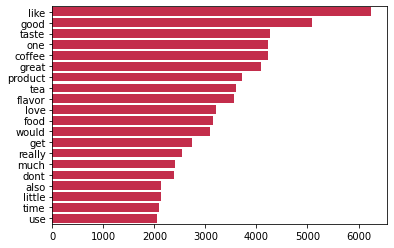

In [51]:
sns.barplot(y = series_freq_most_common.index,
            x = series_freq_most_common,
            color = 'crimson')

In [52]:
# 6. Obtén las 50 palabras más comunes en el dataset y realiza una gráfica de barras 'horizontales' para visualizar su frecuencia.
dict_common_monograms_50 = {}

for element in freq_dist_no_stop_words.most_common(50):
    dict_common_monograms_50[element[0]] = element[1]

series_freq_most_common_50 = pd.Series(dict_common_monograms_50)

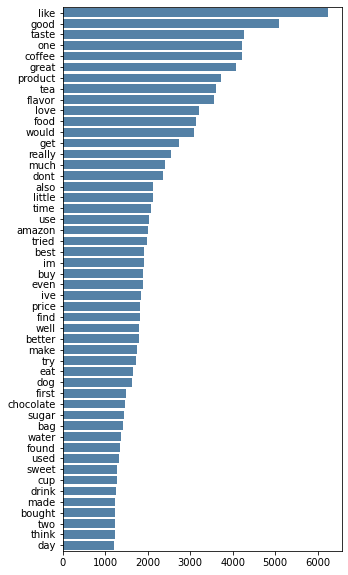

In [53]:
fig, ax = plt.subplots(figsize = (5,10))
sns.barplot(y = series_freq_most_common_50.index, x = series_freq_most_common_50, color = 'steelblue', ax = ax)

In [60]:
for element in freq_dist_bigrams.most_common(5):
    print("_".join(element[0]))

highly_recommend
green_tea
peanut_butter
taste_like
dog_food


In [62]:
# 7. Obtén los 20 bigramas más frecuentes en el dataset y realiza una gráfica de barras 'verticales' para visualizar tu frecuencia.
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(all_words_except_stop_words)))

dict_common_bigrams_20 = {}

for element in freq_dist_bigrams.most_common(20):
    dict_common_bigrams_20[" ".join(element[0])] = element[1]

series_freq_dist_bigrams_20 = pd.Series(dict_common_bigrams_20)

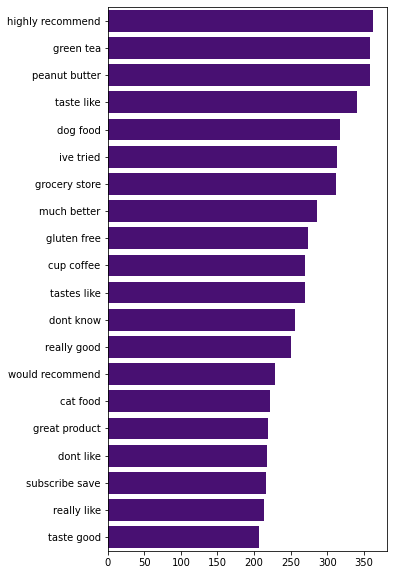

In [63]:
fig, ax = plt.subplots(figsize = (5,10))
sns.barplot(y = series_freq_dist_bigrams_20.index, x = series_freq_dist_bigrams_20, color = 'indigo', ax = ax)

In [64]:
# 8. Obtén una lista de las palabras que tengan 10 o más caracteres 
#    que aparezcan por lo menos 7 veces en el dataset.
unique = set(all_words_except_stop_words)
unique_series = pd.Series(list(unique))

larger_than_10 = unique_series.str.len() >= 10
is_frequent = unique_series.apply(lambda x: freq_dist_no_stop_words[x] >= 7)

unique_series[larger_than_10 & is_frequent]

26        transferred
28         management
102       scrumptious
369       consistancy
384       competitors
             ...     
29543      phenomenal
29730      substances
29741    maltodextrin
29794     vinaigrette
29891      repeatedly
Length: 602, dtype: object

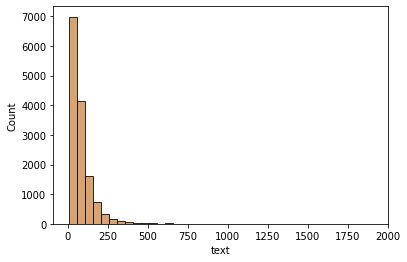

In [67]:
# 9. Realiza un histograma del número de palabras contenidas en cada evaluación
series_length_sentences = tokenized_words.apply(lambda x: len(x))

sns.histplot(series_length_sentences, color = 'peru', binwidth = 50)

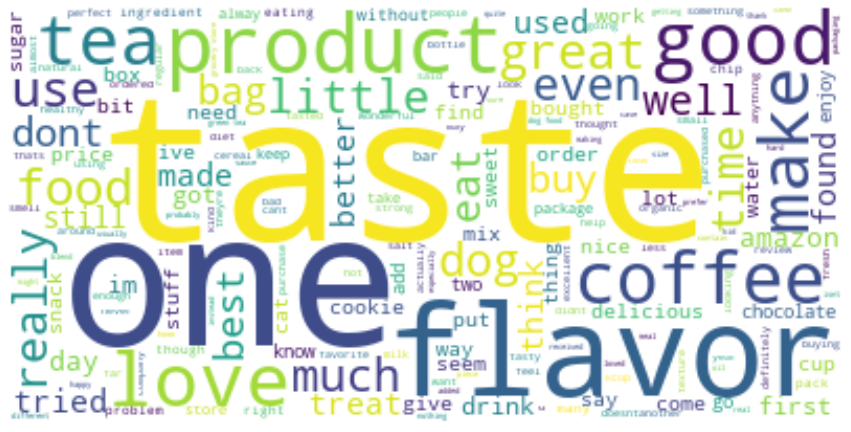

In [68]:
# 10. Genera una nube de palabras con tu dataset.
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()